In [1]:
# This notobook connects to the azure cloud and reads in the volve dataset.
# Further work will go into showing how to explore the dataset
# How to look at the different type of folders and what files each of them contain
# and how to perform operations/read in the a specific files and import it into pandas or xarray
# More informations on the file can be found here
# I figured out how to connect to the file by following the setps n the link below as well
# This file looks specifically at the files contained in the WITSML Realtime drilling data folder
# As for now i am more interested in how I can access the name of the other folders, through python, before choosing a filename to explore
# Having found how to naviguate, albeit it's still redumentary, I will next look into an xml data of my choosing.
# https://frombitumentobinary.com/volve-dataset-exploration.html
# More information here https://www.equinor.com/en/how-and-why/digitalisation-in-our-dna/volve-field-data-village-download.html

In [2]:
from azure.storage.blob import BlockBlobService
import pandas as pd
import xml.etree.ElementTree as ET
from bs4 import BeautifulSoup
from collections import defaultdict
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

In [3]:
# List the account name and sas_token *** I have removed the SAS token in order to allow the user to register properly thorugh Equinor's data portal
#azure_storage_account_name = 'datavillagesa'
azure_storage_account_name = 'datavillagesa'
sas_token = 'sv=2018-03-28&sr=c&sig=VKJ%2BM0yPzM3eN31hBwWtSnR2gC%2FNcDBQWlHDu3eg43U%3D&se=2020-11-17T18%3A44%3A13Z&sp=rl'

# Create a service and use the SAS 
sas_blob_service = BlockBlobService( 
    account_name=azure_storage_account_name, 
    sas_token=sas_token)

filename = 'WITSML Realtime drilling data/'

blob = sas_blob_service.list_blobs('volve', filename)
blob

In [4]:
# Initialize count variable
x = 0
print_var = False
# Initialize dictionary - defaultdict initialized every key to 0
sub_dirs = defaultdict(int)
# Iterate through list generator
for b in blob:
    x+=1
    # Perform this test to avoid files directly under the WITSML folder
    if len(b.name.split('/')) > 2:
        sub_dirs[b.name.split('/')[1]] += 1
        # Not the prettiest way to show an exmample folder structure
        if not print_var and len(b.name.split('/')) > 5:
            print(b.name)
            print_var = True

print('Total Number of Files in WITSML folder: ' + str(x))
print('Total Number of Folders under WITSML folder: ' + str(len(sub_dirs)))
well_names = set(x[x.find('1'):] for x in sub_dirs.keys())
print('Total number of wells: ' + str(len(well_names)))
print('Folders contained under WITSML Folder: ')
for key in sub_dirs.keys():
    print(key)

WITSML Realtime drilling data/NA-NA-15_$47$_9-F-5/1/log/1/1/1/00001.xml
Total Number of Files in WITSML folder: 20087
Total Number of Folders under WITSML folder: 26
Total number of wells: 17
Folders contained under WITSML Folder: 
NA-NA-15_$47$_9-F-5
Norway-NA-15_$47$_9-F-1 C
Norway-NA-15_$47$_9-F-1
Norway-NA-15_$47$_9-F-11 B
Norway-NA-15_$47$_9-F-9 A
Norway-Statoil-15_$47$_9-F-12
Norway-Statoil-15_$47$_9-F-7
Norway-Statoil-NO 15_$47$_9-F-1 B
Norway-Statoil-NO 15_$47$_9-F-1 C
Norway-Statoil-NO 15_$47$_9-F-11
Norway-Statoil-NO 15_$47$_9-F-12
Norway-Statoil-NO 15_$47$_9-F-14
Norway-Statoil-NO 15_$47$_9-F-15
Norway-Statoil-NO 15_$47$_9-F-4
Norway-Statoil-NO 15_$47$_9-F-5
Norway-Statoil-NO 15_$47$_9-F-7
Norway-Statoil-NO 15_$47$_9-F-9
Norway-StatoilHydro-15_$47$_9-F-10
Norway-StatoilHydro-15_$47$_9-F-14
Norway-StatoilHydro-15_$47$_9-F-15
Norway-StatoilHydro-15_$47$_9-F-15A
Norway-StatoilHydro-15_$47$_9-F-15B
Norway-StatoilHydro-15_$47$_9-F-15S
Norway-StatoilHydro-15_$47$_9-F-4
Norway-Stat

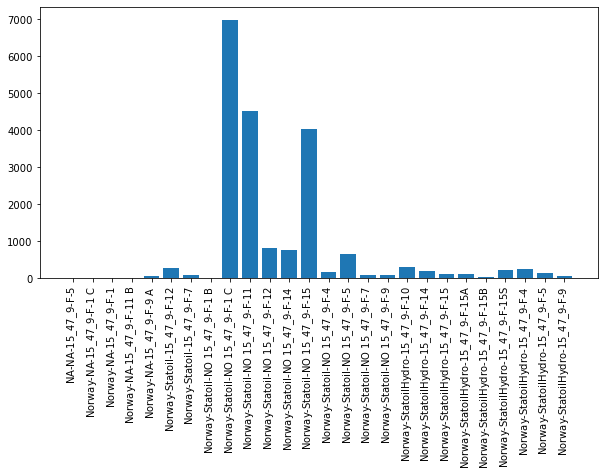

In [5]:
plt.figure(figsize = (10,5))
plt.bar(range(len(sub_dirs)), list(sub_dirs.values()), align='center')
plt.xticks(range(len(sub_dirs)), list(sub_dirs.keys()), rotation='vertical')
plt.show()

In [6]:
# With this update, one can explore the different folders with the Volve dataset
# It may be tedious at first, because one has to first observe the whole blobs
# Then from there, one can use the prefix and delimeter parameters to specify which folders and sub-folders one wants to dig in

sas_blob_service.list_blobs?

Signature:
sas_blob_service.list_blobs(
    container_name,
    prefix=None,
    num_results=None,
    include=None,
    delimiter=None,
    marker=None,
    timeout=None,
)
Docstring:
Returns a generator to list the blobs under the specified container.
The generator will lazily follow the continuation tokens returned by
the service and stop when all blobs have been returned or num_results is reached.

If num_results is specified and the account has more than that number of 
blobs, the generator will have a populated next_marker field once it 
finishes. This marker can be used to create a new generator if more 
results are desired.

:param str container_name:
    Name of existing container.
:param str prefix:
    Filters the results to return only blobs whose names
    begin with the specified prefix.
:param int num_results:
    Specifies the maximum number of blobs to return,
    including all :class:`BlobPrefix` elements. If the request does not specify
    num_results or specifies a

In [7]:
a = sas_blob_service.list_blobs(container_name='volve')
for b in a:
    print("\t" + b.name)

	GeoScience_OW_Archive/VOLVE_PUBLIC.bck
	GeoScience_OW_Archive/VOLVE_PUBLIC_Externalfiles.dszip
	GeoScience_OW_Archive/VOLVE_PUBLIC_Seismic.dszip
	Geophysical_Interpretations/Fault_polygons/2014_Volve_Hugin_Base.dat
	Geophysical_Interpretations/Fault_polygons/2014_Volve_Hugin_Top.dat
	Geophysical_Interpretations/Fault_polygons/README.txt
	Geophysical_Interpretations/Faults/README.txt
	Geophysical_Interpretations/Faults/Volve_Official_Faults.dat
	Geophysical_Interpretations/Horizons/Horizon-OW-IO-formatfile.xml
	Geophysical_Interpretations/Horizons/Horizons_DEPTH/Official_Horizons/BCU+ST10010ZC11_NoF10_160913_adjVolve_EasyDC+STAT+DEPTH.dat
	Geophysical_Interpretations/Horizons/Horizons_DEPTH/Official_Horizons/Hugin_Fm_Base+ST10010ZC11_Near_190314_adj_2999_EasyDC+STAT+DEPTH.dat
	Geophysical_Interpretations/Horizons/Horizons_DEPTH/Official_Horizons/Hugin_Fm_Top+ST10010ZC11_Near_190314_adj2_2760_EasyDC+STAT+DEPTH.dat
	Geophysical_Interpretations/Horizons/Horizons_DEPTH/Official_Horizons/SH

In [8]:
a = sas_blob_service.list_blobs(container_name='volve', delimiter='/')
for b in a:
    print("\t" + b.name)

	GeoScience_OW_Archive/
	Geophysical_Interpretations/
	Production_data/
	Reports/
	Reservoir_Model-Eclipse_model/
	Reservoir_Model-RMS_model/
	Seismic/
	HRS and Terms and conditions for license to data - Volve.pdf
	WITSML Realtime drilling data/
	Well_logs/
	Well_logs_pr_WELL/
	Well_technical_data/


In [9]:
a = sas_blob_service.list_blobs(container_name='volve', prefix='WITSML Realtime drilling data/', delimiter = '/')
file = []
for b in a:
    file.append(b.name)
    print("\t" + b.name)

	WITSML Realtime drilling data/NA-NA-15_$47$_9-F-5/
	WITSML Realtime drilling data/Norway-NA-15_$47$_9-F-1 C/
	WITSML Realtime drilling data/Norway-NA-15_$47$_9-F-1/
	WITSML Realtime drilling data/Norway-NA-15_$47$_9-F-11 B/
	WITSML Realtime drilling data/Norway-NA-15_$47$_9-F-9 A/
	WITSML Realtime drilling data/Norway-Statoil-15_$47$_9-F-12/
	WITSML Realtime drilling data/Norway-Statoil-15_$47$_9-F-7/
	WITSML Realtime drilling data/Norway-Statoil-NO 15_$47$_9-F-1 B/
	WITSML Realtime drilling data/Norway-Statoil-NO 15_$47$_9-F-1 C/
	WITSML Realtime drilling data/Norway-Statoil-NO 15_$47$_9-F-11/
	WITSML Realtime drilling data/Norway-Statoil-NO 15_$47$_9-F-12/
	WITSML Realtime drilling data/Norway-Statoil-NO 15_$47$_9-F-14/
	WITSML Realtime drilling data/Norway-Statoil-NO 15_$47$_9-F-15/
	WITSML Realtime drilling data/Norway-Statoil-NO 15_$47$_9-F-4/
	WITSML Realtime drilling data/Norway-Statoil-NO 15_$47$_9-F-5/
	WITSML Realtime drilling data/Norway-Statoil-NO 15_$47$_9-F-7/
	WITSML Re

In [10]:
a = sas_blob_service.list_blobs(container_name='volve', 
                                prefix=file[0], 
                               delimiter = '/')
for b in a:
    print("\t" + b.name)

	WITSML Realtime drilling data/NA-NA-15_$47$_9-F-5/1/
	WITSML Realtime drilling data/NA-NA-15_$47$_9-F-5/_wellInfo/
	WITSML Realtime drilling data/NA-NA-15_$47$_9-F-5/MetaFileInfo.txt


In [11]:
# Given that I am more interested in the XML datasets, I will choose a well of my chossing and look into it
#### I originally looked at the data on a different well log, and interestingly 
# there was only one line of data that was retrieved using this methodology. 
# Either the well came like that, or this methodology did not capture it properly
a = sas_blob_service.list_blobs(container_name='volve', 
                                prefix='WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-14/1/', 
                                delimiter = '/')
for b in a:
    print("\t" + b.name)

	WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-14/1/_wellboreInfo/
	WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-14/1/log/
	WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-14/1/trajectory/


In [12]:
# Let's look at the log
a = sas_blob_service.list_blobs(container_name='volve', 
                                prefix='WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-14/1/log/1/1/1/', 
                               delimiter = '/')
file = [] 
for b in a:
    file.append(b.name)
    print("\t" + b.name)
file[0]

	WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-14/1/log/1/1/1/00001.xml
	WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-14/1/log/1/1/1/00002.xml
	WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-14/1/log/1/1/1/00003.xml


'WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-14/1/log/1/1/1/00001.xml'

In [13]:
x = sas_blob_service.get_blob_to_text('volve', file[0])
x.content

'<?xml version="1.0" encoding="UTF-8"?><logs xmlns="http://www.witsml.org/schemas/1series" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" version="1.4.1.1"><log uidWell="W-353085" uidWellbore="B-353085" uid="L-567705-MD"><nameWell>15/9-F-14</nameWell><nameWellbore>15/9-F-14 - Main Wellbore</nameWellbore><name>MWD Geocervices Real Time Data 26in - MD Log</name><serviceCompany>Schlumberger</serviceCompany><runNumber>2</runNumber><pass>Drilling</pass><creationDate>2007-12-03T17:51:24.000Z</creationDate><indexType>measured depth</indexType><startIndex uom="m">0</startIndex><endIndex uom="m">457.011</endIndex><direction>increasing</direction><indexCurve>DEPTH</indexCurve><priv_dTimPriority>2007-12-03T17:51:24.000Z</priv_dTimPriority><logCurveInfo uid="G_IC5"><mnemonic>G_IC5</mnemonic><unit>ppm</unit><minIndex uom="m">193.999</minIndex><maxIndex uom="m">456.999</maxIndex><curveDescription>Gas, Iso-C5</curveDescription><dataSource>MudLog</dataSource><typeLogData>double</typeLogData></l

In [14]:
soup = BeautifulSoup(x.content, 'xml')
y = []
for tag in soup.find_all():
    y.append(tag.name)
y

['logs',
 'log',
 'nameWell',
 'nameWellbore',
 'name',
 'serviceCompany',
 'runNumber',
 'pass',
 'creationDate',
 'indexType',
 'startIndex',
 'endIndex',
 'direction',
 'indexCurve',
 'priv_dTimPriority',
 'logCurveInfo',
 'mnemonic',
 'unit',
 'minIndex',
 'maxIndex',
 'curveDescription',
 'dataSource',
 'typeLogData',
 'logCurveInfo',
 'mnemonic',
 'unit',
 'minIndex',
 'maxIndex',
 'curveDescription',
 'dataSource',
 'typeLogData',
 'logCurveInfo',
 'mnemonic',
 'unit',
 'minIndex',
 'maxIndex',
 'curveDescription',
 'dataSource',
 'typeLogData',
 'logCurveInfo',
 'mnemonic',
 'unit',
 'minIndex',
 'maxIndex',
 'curveDescription',
 'dataSource',
 'typeLogData',
 'logCurveInfo',
 'mnemonic',
 'unit',
 'minIndex',
 'maxIndex',
 'curveDescription',
 'dataSource',
 'typeLogData',
 'logCurveInfo',
 'mnemonic',
 'unit',
 'minIndex',
 'maxIndex',
 'curveDescription',
 'dataSource',
 'typeLogData',
 'logCurveInfo',
 'mnemonic',
 'unit',
 'minIndex',
 'maxIndex',
 'curveDescription',
 'da

In [15]:
soup = BeautifulSoup(x.content, 'xml')
y = []
for tag in soup.find_all():
    print(tag.name)

logs
log
nameWell
nameWellbore
name
serviceCompany
runNumber
pass
creationDate
indexType
startIndex
endIndex
direction
indexCurve
priv_dTimPriority
logCurveInfo
mnemonic
unit
minIndex
maxIndex
curveDescription
dataSource
typeLogData
logCurveInfo
mnemonic
unit
minIndex
maxIndex
curveDescription
dataSource
typeLogData
logCurveInfo
mnemonic
unit
minIndex
maxIndex
curveDescription
dataSource
typeLogData
logCurveInfo
mnemonic
unit
minIndex
maxIndex
curveDescription
dataSource
typeLogData
logCurveInfo
mnemonic
unit
minIndex
maxIndex
curveDescription
dataSource
typeLogData
logCurveInfo
mnemonic
unit
minIndex
maxIndex
curveDescription
dataSource
typeLogData
logCurveInfo
mnemonic
unit
minIndex
maxIndex
curveDescription
dataSource
typeLogData
logCurveInfo
mnemonic
unit
minIndex
maxIndex
curveDescription
dataSource
typeLogData
logCurveInfo
mnemonic
unit
minIndex
maxIndex
dataSource
typeLogData
logCurveInfo
mnemonic
unit
minIndex
maxIndex
curveDescription
dataSource
typeLogData
logCurveInfo
mnemon

In [16]:
set([str(tag.name) for tag in soup.find_all()])

{'commonData',
 'creationDate',
 'curveDescription',
 'dTimCreation',
 'dTimLastChange',
 'data',
 'dataSource',
 'direction',
 'endIndex',
 'indexCurve',
 'indexType',
 'log',
 'logCurveInfo',
 'logData',
 'logs',
 'maxIndex',
 'minIndex',
 'mnemonic',
 'mnemonicList',
 'name',
 'nameWell',
 'nameWellbore',
 'pass',
 'priv_dTimPriority',
 'priv_dTimReceived',
 'priv_ipLastChange',
 'priv_ipOwner',
 'priv_userLastChange',
 'priv_userOwner',
 'runNumber',
 'serviceCompany',
 'sourceName',
 'startIndex',
 'typeLogData',
 'unit',
 'unitList'}

In [17]:
from komle.bindings.v1411.read import witsml
from komle import utils as ku
import pandas as pd

In [18]:
print('1. ' + soup.find_all('mnemonicList')[0].text)
print('2. ' + soup.find_all('unitList')[0].text)

1. DEPTH,G_IC5,BDDI,INCL_CONT_RT,TDH,TVA,SHKRSK_RT,G_NC5,MFOP,NRPM_RT,TQA,RHX_RT,DVER,SHKTOT_RT,PASS_NAME,RPM,SPPA,TREV,MTOA,DRTV,BITRUN,GTF_RT,GASA,HKLD,ATMP_MWD,ROP,DXC,TFLO,MDOA,ACTC,GRM1,GRR,CRPM_RT,SHKRATE_RT,G_H2SA,SWOB,AZIM_CONT_RT,MWTI,TRPM_RT,BDTI,TEMP_DNI_RT,RGX_RT,SHK3TM_RT,APRS_MWD,ROP5,BOUNCE_RT,G_C2,TVDE,AJAM_MWD,SHKPK_RT,STICK_RT,G_C3,ECD_MWD,G_IC4,DRILLTM_RT,G_C1,G_NC4,CRS1
2. m,ppm,m,dega,degC,m3,unitless,ppm,%,unitless,kN.m,unitless,m,unitless,unitless,rpm,kPa,unitless,degC,m,unitless,dega,%,kkgf,degC,m/h,unitless,L/min,g/cm3,unitless,gAPI,1/s,rpm,1/s,ppm,kkgf,dega,g/cm3,rpm,h,degC,unitless,min,kPa,m/h,unitless,ppm,m,unitless,m/s2,rpm,ppm,g/cm3,ppm,unitless,ppm,ppm,unitless


In [19]:
print('Length of Mnemonic List: ' + str(len(soup.find_all('mnemonicList')[0].text.split(','))))
print('Length of Unit List: ' + str(len(soup.find_all('unitList')[0].text.split(','))))

Length of Mnemonic List: 58
Length of Unit List: 58


In [20]:
def units(df):
    '''
    The intent of this function is to convert units from metric to US

    Input: df - pandas dataframe
    Output: df - pandas dataframe with columns transformed based on current units

    '''
    corr_columns = []
    for col in df.columns:
        corr_columns.append(col.split(' - ')[0])
        try:
            df[col] = df[col].astype(float)
        except:
            continue
        # Analyze column units and transform if appropriate
        # Future work will use dictionary rather than series of if statements
        if (col.split(' - ')[1] == 'm') | (col.split(' - ')[1] == 'm/h') | (col.split(' - ')[1] == 'm/s2'):
            df[col] = df[col].astype(float) * 3.28084
        if col.split(' - ')[1] == 'degC':
            df[col] = (df[col].astype(float) * 9/5) + 32
        if col.split(' - ')[1] == 'm3':
            df[col] = df[col].astype(float) * 6.289814
        if col.split(' - ')[1] == 'kkgf':
            df[col] = df[col].astype(float) * 2.2
        if col.split(' - ')[1] == 'kPa':
            df[col] = df[col].astype(float) * 0.145038
        if col.split(' - ')[1] == 'L/min':
            df[col] = df[col].astype(float) * 0.264172875
        if col.split(' - ')[1] == 'g/cm3':
            df[col] = df[col].astype(float) * 8.3454
        if col.split(' - ')[1] == 'kN.m':
            df[col] = df[col].astype(float) * 0.737562

    df.columns = corr_columns
    return df

In [21]:
# get a list of the log names (columns in our dataframe)
log_names = soup.find_all('mnemonicList')
# also use the units to determine how to convert to english units
unit_names = soup.find_all('unitList')
# define that the header is the 'mnemonic - unit' this simiplifies the pandas dataframe format
header = [i + ' - ' + j for i, j in zip(log_names[0].string.split(","), unit_names[0].string.split(","))] 
data = soup.find_all('data')
# define out pandas dataframe - the columns are the header - a concatenation of the mnemonic and the unit, the data is parsed by looping over every 
# list found under the data tag.
df = pd.DataFrame(columns=header, 
                  data=[row.string.split(',') for row in data])
# replace blank values with nan
df = df.replace('', np.NaN)
# run the dataframe through the units function
df = units(df)

df.head()

DEPTH  G_IC5  BDDI  INCL_CONT_RT  TDH  TVA  SHKRSK_RT  G_NC5  MFOP  \
0    0.000000    NaN   NaN           NaN  NaN  NaN        NaN    NaN   NaN   
1  300.688986    NaN   NaN           NaN  NaN  NaN        NaN    NaN   NaN   
2  301.299222    NaN   NaN           NaN  NaN  NaN        NaN    NaN   NaN   
3  301.610902    NaN   NaN           NaN  NaN  NaN        NaN    NaN   NaN   
4  302.240823    NaN   NaN           NaN  NaN  NaN        NaN    NaN   NaN   

   NRPM_RT  ...  AJAM_MWD  SHKPK_RT  STICK_RT  G_C3 ECD_MWD  G_IC4  \
0      NaN  ...       NaN       NaN       NaN   NaN     NaN    NaN   
1      NaN  ...       NaN       NaN       NaN   NaN     NaN    NaN   
2      NaN  ...       NaN       NaN       NaN   NaN     NaN    NaN   
3      NaN  ...       NaN       NaN       NaN   NaN     NaN    NaN   
4      NaN  ...       NaN       NaN       NaN   NaN     NaN    NaN   

   DRILLTM_RT  G_C1  G_NC4  CRS1  
0     601.201   NaN    NaN   NaN  
1         NaN   NaN    NaN   NaN  
2         NaN   NaN    NaN   NaN  
3         NaN   NaN    NaN   NaN  
4         NaN   NaN    NaN   NaN  

[5 rows x 58 columns]

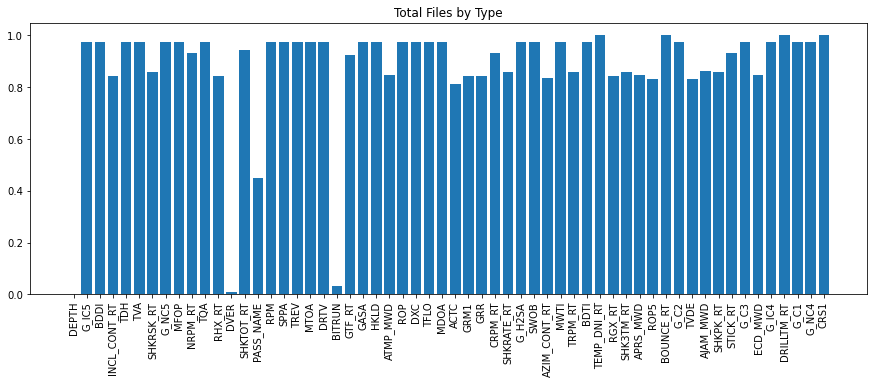

In [22]:
plt.figure(figsize = (15,5))
plt.bar(range(len(df.isna().sum())), list(df.isna().sum().values / len(df)), align='center')
plt.xticks(range(len(df.isna().sum())), df.columns.to_list(), rotation='vertical')
plt.title('Total Files by Type')
plt.show()

In [23]:
range(len(df.isna().sum()))

range(0, 58)

In [24]:
list(df.isna().sum().values)# / len(df))

[0,
 9737,
 9736,
 8450,
 9737,
 9736,
 8604,
 9737,
 9736,
 9316,
 9736,
 8450,
 72,
 9449,
 4494,
 9736,
 9736,
 9736,
 9737,
 9737,
 309,
 9225,
 9737,
 9736,
 8462,
 9736,
 9736,
 9736,
 9737,
 8131,
 8449,
 8449,
 9318,
 8604,
 9737,
 9736,
 8365,
 9736,
 8601,
 9736,
 9999,
 8450,
 8604,
 8463,
 8328,
 9999,
 9737,
 8314,
 8631,
 8604,
 9316,
 9737,
 8488,
 9737,
 9999,
 9737,
 9737,
 9999]

In [25]:
df.isna().sum()

DEPTH              0
G_IC5           9737
BDDI            9736
INCL_CONT_RT    8450
TDH             9737
TVA             9736
SHKRSK_RT       8604
G_NC5           9737
MFOP            9736
NRPM_RT         9316
TQA             9736
RHX_RT          8450
DVER              72
SHKTOT_RT       9449
PASS_NAME       4494
RPM             9736
SPPA            9736
TREV            9736
MTOA            9737
DRTV            9737
BITRUN           309
GTF_RT          9225
GASA            9737
HKLD            9736
ATMP_MWD        8462
ROP             9736
DXC             9736
TFLO            9736
MDOA            9737
ACTC            8131
GRM1            8449
GRR             8449
CRPM_RT         9318
SHKRATE_RT      8604
G_H2SA          9737
SWOB            9736
AZIM_CONT_RT    8365
MWTI            9736
TRPM_RT         8601
BDTI            9736
TEMP_DNI_RT     9999
RGX_RT          8450
SHK3TM_RT       8604
APRS_MWD        8463
ROP5            8328
BOUNCE_RT       9999
G_C2            9737
TVDE         

In [26]:
#taking all the non nan values 
df[~np.isnan(df['ROP'])][['DEPTH','ROP', 'RPM', 'TQA']]
#df1 = df[~np.isnan(df['Mud Volume'])]

DEPTH         ROP    RPM       TQA
298    636.479679   31.922572   62.0  2.610969
307    639.760519   26.181103   45.0  2.360199
316    643.041359   26.870078   44.0  2.389701
328    646.328761    4.954068   44.0  2.301194
343    649.609601   95.833333   44.0  1.017836
...           ...         ...    ...       ...
9871  1486.220520   63.713913  155.0  3.392785
9912  1489.501360   53.215223  155.0  3.119887
9946  1492.778919   85.925202  155.0  3.923830
9976  1496.059759  118.143043  155.0  3.798444
9998  1499.340599  123.326776  155.0  4.255733

[264 rows x 4 columns]

In [27]:
### Aggregating all the log file in the directory for that well
### Will look later into the meaning of each of them
filename = 'WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-14/1/log/1/1/1'
blob = sas_blob_service.list_blobs('volve', filename)
master_df = pd.DataFrame()
for x, file in enumerate(blob):
    blob = sas_blob_service.get_blob_to_text('volve', file.name)
    soup = BeautifulSoup(blob.content, 'xml')
    log_names = soup.find_all('mnemonicList')
    unit_names = soup.find_all('unitList')
    header = [i + ' - ' + j for i, j in zip(log_names[0].string.split(","), unit_names[0].string.split(","))] 
    data = soup.find_all('data')
    df = pd.DataFrame(columns=header, 
                      data=[row.string.split(',') for row in data])
    df = df.replace('', np.NaN)
    df = units(df)
    if x == 0:
        master_df = df
    else:
        master_df = pd.concat([master_df, df], sort = False)
print('Total Length of DataFrame: ' + str(len(master_df)))
master_df.head()

Total Length of DataFrame: 30000


DEPTH  G_IC5  BDDI  INCL_CONT_RT  TDH  TVA  SHKRSK_RT  G_NC5  MFOP  \
0    0.000000    NaN   NaN           NaN  NaN  NaN        NaN    NaN   NaN   
1  300.688986    NaN   NaN           NaN  NaN  NaN        NaN    NaN   NaN   
2  301.299222    NaN   NaN           NaN  NaN  NaN        NaN    NaN   NaN   
3  301.610902    NaN   NaN           NaN  NaN  NaN        NaN    NaN   NaN   
4  302.240823    NaN   NaN           NaN  NaN  NaN        NaN    NaN   NaN   

   NRPM_RT  ...  AJAM_MWD  SHKPK_RT  STICK_RT  G_C3 ECD_MWD  G_IC4  \
0      NaN  ...       NaN       NaN       NaN   NaN     NaN    NaN   
1      NaN  ...       NaN       NaN       NaN   NaN     NaN    NaN   
2      NaN  ...       NaN       NaN       NaN   NaN     NaN    NaN   
3      NaN  ...       NaN       NaN       NaN   NaN     NaN    NaN   
4      NaN  ...       NaN       NaN       NaN   NaN     NaN    NaN   

   DRILLTM_RT  G_C1  G_NC4  CRS1  
0     601.201   NaN    NaN   NaN  
1         NaN   NaN    NaN   NaN  
2         NaN   NaN    NaN   NaN  
3         NaN   NaN    NaN   NaN  
4         NaN   NaN    NaN   NaN  

[5 rows x 58 columns]

In [28]:
master_df[~np.isnan(master_df['ROP'])][['DEPTH','ROP', 'RPM', 'TQA']]

DEPTH         ROP    RPM       TQA
298    636.479679   31.922572   62.0  2.610969
307    639.760519   26.181103   45.0  2.360199
316    643.041359   26.870078   44.0  2.389701
328    646.328761    4.954068   44.0  2.301194
343    649.609601   95.833333   44.0  1.017836
...           ...         ...    ...       ...
9864  3484.248799  127.296589  160.0  2.633096
9890  3487.529639  127.460629  160.0  2.478208
9914  3490.810479  139.173226  160.0  2.323321
9940  3494.091319   44.652231  160.0  6.114389
9991  3497.378721   38.943570  160.0  7.205982

[869 rows x 4 columns]

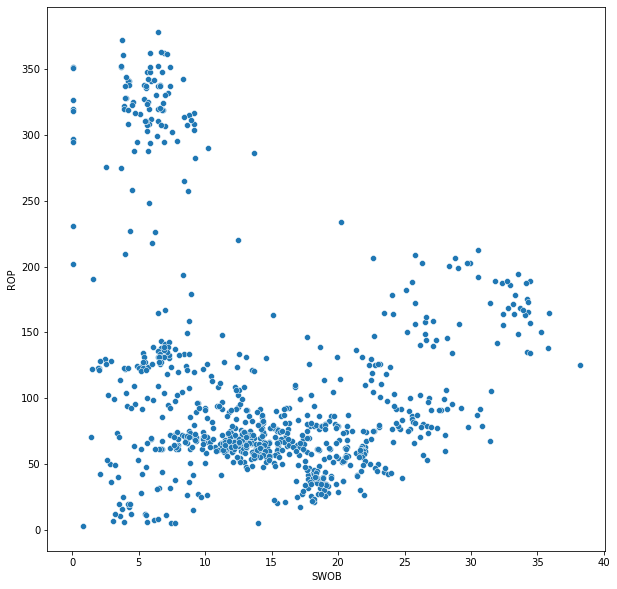

In [29]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'SWOB', y = 'ROP', data = master_df)

In [30]:
### As we can see above, the dataset is eratic, but a good driller may be able to read it. 
### A way to make sense of it will be to devide the data per rock type being drilled
### That may give a more uniform result.

In [31]:
#a = sas_blob_service.list_blobs(container_name='volve', 
#                                prefix='WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-15B/1/log/1/2/1/')
#for b in a:
#    b
#x = sas_blob_service.get_blob_to_text('volve', b.name)
#soup = BeautifulSoup(x.content, 'xml')
#set([str(tag.name) for tag in soup.find_all()])
#print('1. ' + soup.find_all('mnemonicList')[0].text)
#print('2. ' + soup.find_all('unitList')[0].text)
#print('Length of Mnemonic List: ' + str(len(soup.find_all('mnemonicList')[0].text.split(','))))
#print('Length of Unit List: ' + str(len(soup.find_all('unitList')[0].text.split(','))))